EDA DEBUNKING MENSTRUAL MYTHS

In [41]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, kstest
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames 


# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

EDA menstrual_cycle_with_factos.csv

In [42]:
df_mcwf = pd.read_csv("../files/raw/menstrual_cycle_with_factors.csv")

In [43]:
df_mcwf.head()

,User ID,Age,BMI,Stress Level,Exercise Frequency,Sleep Hours,Diet,Cycle Start Date,Cycle Length,Period Length,Next Cycle Start Date,Symptoms
0,1,18,29.28,2,Moderate,5.4,Low Carb,2024-11-13 20:52:34.915012,26,7,2024-12-09 20:52:34.915012,Headache
1,1,18,29.28,2,Moderate,5.4,Low Carb,2024-12-09 20:52:34.915012,32,5,2025-01-10 20:52:34.915012,Fatigue
2,1,18,29.28,2,Moderate,5.4,Low Carb,2025-01-10 20:52:34.915012,41,7,2025-02-20 20:52:34.915012,Fatigue
3,1,18,29.28,2,Moderate,5.4,Low Carb,2025-02-20 20:52:34.915012,27,3,2025-03-19 20:52:34.915012,Fatigue
4,1,18,29.28,2,Moderate,5.4,Low Carb,2025-03-19 20:52:34.915012,42,5,2025-04-30 20:52:34.915012,Cramps


In [44]:
df_mcwf.columns

Index(['User ID', 'Age', 'BMI', 'Stress Level', 'Exercise Frequency',
       'Sleep Hours', 'Diet', 'Cycle Start Date', 'Cycle Length',
       'Period Length', 'Next Cycle Start Date', 'Symptoms'],
      dtype='object')

In [45]:
df_mcwf = df_mcwf[['User ID', 'Age', 'BMI', 'Stress Level', 'Exercise Frequency',
       'Sleep Hours', 'Cycle Length',
       'Period Length', 'Symptoms']]

In [46]:
df_mcwf.to_csv("../files/processed/mens_cycle.csv")

In [47]:
df_mcwf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User ID             895 non-null    int64  
 1   Age                 895 non-null    int64  
 2   BMI                 895 non-null    float64
 3   Stress Level        895 non-null    int64  
 4   Exercise Frequency  895 non-null    object 
 5   Sleep Hours         895 non-null    float64
 6   Cycle Length        895 non-null    int64  
 7   Period Length       895 non-null    int64  
 8   Symptoms            895 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 63.1+ KB


In [48]:
df_mcwf.isna().sum()

User ID               0
Age                   0
BMI                   0
Stress Level          0
Exercise Frequency    0
Sleep Hours           0
Cycle Length          0
Period Length         0
Symptoms              0
dtype: int64

In [49]:
df_mcwf.duplicated().sum()


11

In [50]:
df_mcwf[df_mcwf["User ID"]== 1]


,User ID,Age,BMI,Stress Level,Exercise Frequency,Sleep Hours,Cycle Length,Period Length,Symptoms
0,1,18,29.28,2,Moderate,5.4,26,7,Headache
1,1,18,29.28,2,Moderate,5.4,32,5,Fatigue
2,1,18,29.28,2,Moderate,5.4,41,7,Fatigue
3,1,18,29.28,2,Moderate,5.4,27,3,Fatigue
4,1,18,29.28,2,Moderate,5.4,42,5,Cramps
5,1,18,29.28,2,Moderate,5.4,41,5,Fatigue
6,1,18,29.28,2,Moderate,5.4,31,4,Headache
7,1,18,29.28,2,Moderate,5.4,48,7,Fatigue
8,1,18,29.28,2,Moderate,5.4,29,3,Fatigue
9,1,18,29.28,2,Moderate,5.4,47,4,Headache


In [51]:
df_mcwf[df_mcwf["User ID"]== 2]


,User ID,Age,BMI,Stress Level,Exercise Frequency,Sleep Hours,Cycle Length,Period Length,Symptoms
11,2,34,29.57,4,Low,5.4,26,4,Bloating
12,2,34,29.57,4,Low,5.4,34,6,Bloating
13,2,34,29.57,4,Low,5.4,38,7,Fatigue
14,2,34,29.57,4,Low,5.4,29,4,Mood Swings
15,2,34,29.57,4,Low,5.4,34,5,Bloating
16,2,34,29.57,4,Low,5.4,31,7,Fatigue
17,2,34,29.57,4,Low,5.4,34,4,Mood Swings
18,2,34,29.57,4,Low,5.4,47,7,Mood Swings
19,2,34,29.57,4,Low,5.4,37,5,Headache


In [52]:
df_mcwf[df_mcwf["User ID"]== 3]


,User ID,Age,BMI,Stress Level,Exercise Frequency,Sleep Hours,Cycle Length,Period Length,Symptoms
20,3,22,29.44,1,Moderate,8.6,50,4,Cramps
21,3,22,29.44,1,Moderate,8.6,40,4,Cramps
22,3,22,29.44,1,Moderate,8.6,25,5,Cramps
23,3,22,29.44,1,Moderate,8.6,38,3,Headache
24,3,22,29.44,1,Moderate,8.6,40,3,Bloating
25,3,22,29.44,1,Moderate,8.6,49,3,Headache
26,3,22,29.44,1,Moderate,8.6,28,3,Mood Swings
27,3,22,29.44,1,Moderate,8.6,37,5,Fatigue
28,3,22,29.44,1,Moderate,8.6,49,6,Headache
29,3,22,29.44,1,Moderate,8.6,46,4,Bloating


<Axes: xlabel='BMI', ylabel='Cycle Length'>

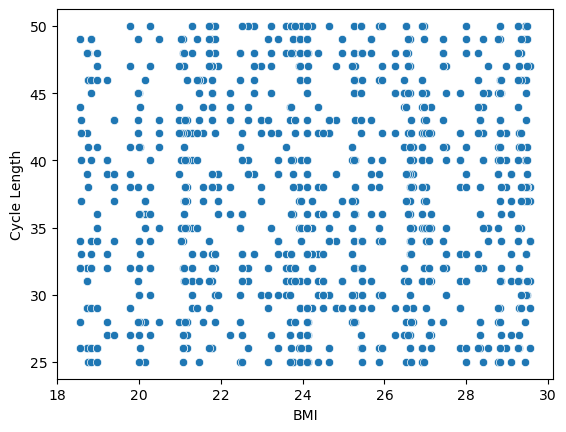

In [53]:
sns.scatterplot(data=df_mcwf, x='BMI', y='Cycle Length')


<Axes: xlabel='Age', ylabel='Cycle Length'>

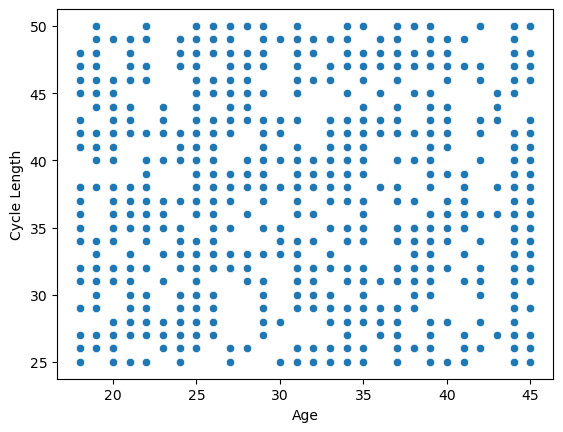

In [54]:
sns.scatterplot(data=df_mcwf, x='Age', y='Cycle Length')


<Axes: xlabel='Cycle Length', ylabel='Sleep Hours'>

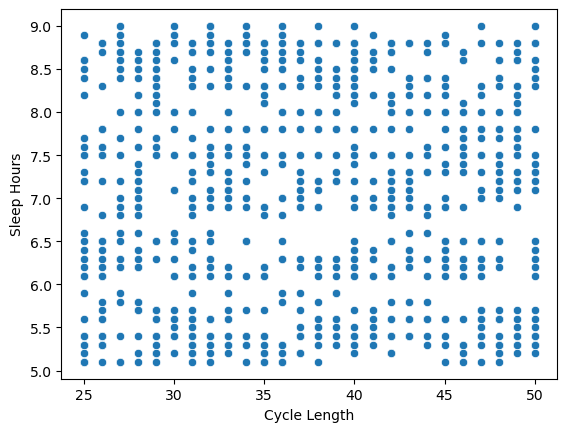

In [55]:
sns.scatterplot(data=df_mcwf, y='Sleep Hours', x='Cycle Length')


<Axes: xlabel='Cycle Length', ylabel='Stress Level'>

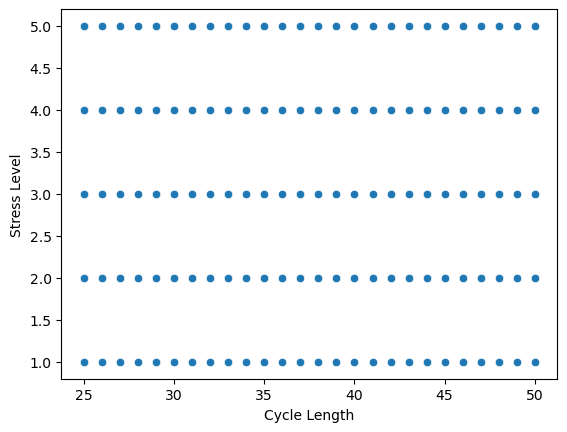

In [56]:
sns.scatterplot(data=df_mcwf, y='Stress Level', x='Cycle Length')


In [57]:
sns.barplot(data=df_mcwf, x='Diet', y='Cycle Length')


ValueError: Could not interpret value `Diet` for `x`. An entry with this name does not appear in `data`.

In [ ]:
sns.barplot(data=df_mcwf, x='Diet', y='Symptoms')


In [ ]:
sns.countplot(data=df_mcwf, x='Diet', hue='Symptoms')

In [ ]:
sns.countplot(data=df_mcwf, x='Diet')

EDA Altas hospitalarias

In [58]:
df_altas = pd.read_csv("../files/raw/altas_hospitalarias.csv", sep= ";")

In [59]:
df_altas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Diagnóstico principal (CIE10MC)  2250 non-null   object
 1   Sexo                             2250 non-null   object
 2   Motivo del alta                  2250 non-null   object
 3   Total                            2250 non-null   object
dtypes: object(4)
memory usage: 70.4+ KB


In [60]:
df_altas["Diagnóstico principal (CIE10MC)"].unique()

array(['0000 TODOS LOS DIAGNÓSTICOS A00-Z99 (excluyendo los códigos V, W, X, Y)',
       '0100 CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS A00-B99, U07.1',
       '0101 Enfermedades infecciosas intestinales, excepto diarrea A00-A08',
       '0102 Infecciones intestinales mal definidas A09',
       '0103 Tuberculosis A15-A19, B90', '0104 Septicemia A40-A41',
       '0105 Infección del virus de la inmunodeficiencia humana B20',
       '0106 COVID-19 U07.1, U09.9',
       '0107 Otras enfermedades infecciosas y parasitarias Resto de  A00-B99',
       '0200 NEOPLASIAS C00-D49',
       '0201 Neoplasias malignas de colon, recto y ano  C18-C21',
       '0202 Neoplasias malignas de tráquea, bronquios y pulmón  C33-C34',
       '0203 Melanoma y otras neoplasias malignas de la piel C43-C44',
       '0204 Neoplasia maligna de la mama  C50',
       '0205 Neoplasia maligna del útero C53-C55',
       '0206 Neoplasia maligna del ovario C56',
       '0207 Neoplasia maligna de la próstata C61',
    

In [61]:
df_altas["Sexo"].unique()

array(['Ambos sexos', 'Hombres', 'Mujeres'], dtype=object)

In [62]:
df_altas_m = df_altas[df_altas["Sexo"]== "Mujeres"]

In [63]:
df_altas_m["Diagnóstico principal (CIE10MC)"].unique()

array(['0000 TODOS LOS DIAGNÓSTICOS A00-Z99 (excluyendo los códigos V, W, X, Y)',
       '0100 CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS A00-B99, U07.1',
       '0101 Enfermedades infecciosas intestinales, excepto diarrea A00-A08',
       '0102 Infecciones intestinales mal definidas A09',
       '0103 Tuberculosis A15-A19, B90', '0104 Septicemia A40-A41',
       '0105 Infección del virus de la inmunodeficiencia humana B20',
       '0106 COVID-19 U07.1, U09.9',
       '0107 Otras enfermedades infecciosas y parasitarias Resto de  A00-B99',
       '0200 NEOPLASIAS C00-D49',
       '0201 Neoplasias malignas de colon, recto y ano  C18-C21',
       '0202 Neoplasias malignas de tráquea, bronquios y pulmón  C33-C34',
       '0203 Melanoma y otras neoplasias malignas de la piel C43-C44',
       '0204 Neoplasia maligna de la mama  C50',
       '0205 Neoplasia maligna del útero C53-C55',
       '0206 Neoplasia maligna del ovario C56',
       '0207 Neoplasia maligna de la próstata C61',
    

       '1409 Trastornos de la menstruación, menopausia y otras afecciones del aparato genital femenino N91-N95',
              '1408 Enfermedad inflamatoria de los órganos pélvicos femeninos N70-N77',
                     '0205 Neoplasia maligna del útero C53-C55',
       '0206 Neoplasia maligna del ovario C56',
              '0212 Leiomioma uterino D25',       '2102 Asistencia anticonceptiva Z30',




In [64]:
diagnosticos = ['1409 Trastornos de la menstruación, menopausia y otras afecciones del aparato genital femenino N91-N95', '1408 Enfermedad inflamatoria de los órganos pélvicos femeninos N70-N77', '1410 Otros trastornos del sistema genitourinario Resto de N00-N99','0400 ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METABÓLICAS E00-E89','0212 Leiomioma uterino D25']

In [65]:
df_altas_m = df_altas_m[df_altas_m["Diagnóstico principal (CIE10MC)"].isin(diagnosticos)]

In [66]:
df_altas_m.to_csv("../files/processed/discharged_f.csv")

In [ ]:
df_altas[(df_altas["Diagnóstico principal (CIE10MC)"] == '1410 Otros trastornos del sistema genitourinario Resto de N00-N99') & (df_altas["Sexo"] == 'Hombres')]

,Diagnóstico principal (CIE10MC),Sexo,Motivo del alta,Total
1700,1410 Otros trastornos del sistema genitourinar...,Hombres,total,5.834
1701,1410 Otros trastornos del sistema genitourinar...,Hombres,curación o mejoría,5.529
1702,1410 Otros trastornos del sistema genitourinar...,Hombres,traslado a otros centros,216
1703,1410 Otros trastornos del sistema genitourinar...,Hombres,fallecimiento,50
1704,1410 Otros trastornos del sistema genitourinar...,Hombres,otras causas,39


In [ ]:
df_altas["Total"][df_altas["Motivo del alta"]== "total"]



In [ ]:
df_altas

,Diagnóstico principal (CIE10MC),Sexo,Motivo del alta,Total
0,0000 TODOS LOS DIAGNÓSTICOS A00-Z99 (excluyend...,Ambos sexos,total,4.751.829
1,0000 TODOS LOS DIAGNÓSTICOS A00-Z99 (excluyend...,Ambos sexos,curación o mejoría,4.181.592
2,0000 TODOS LOS DIAGNÓSTICOS A00-Z99 (excluyend...,Ambos sexos,traslado a otros centros,281.999
3,0000 TODOS LOS DIAGNÓSTICOS A00-Z99 (excluyend...,Ambos sexos,fallecimiento,226.359
4,0000 TODOS LOS DIAGNÓSTICOS A00-Z99 (excluyend...,Ambos sexos,otras causas,61.879
...,...,...,...,...
2245,ALTAS SIN DIAGNÓSTICOS,Mujeres,total,5.323
2246,ALTAS SIN DIAGNÓSTICOS,Mujeres,curación o mejoría,4.070
2247,ALTAS SIN DIAGNÓSTICOS,Mujeres,traslado a otros centros,299
2248,ALTAS SIN DIAGNÓSTICOS,Mujeres,fallecimiento,802


EDA Endometriosis

In [ ]:
df_endo = pd.read_csv("../files/raw/structured_endometriosis_data.csv")

In [ ]:
df_endo.info()

In [ ]:
df_endo.head()

In [ ]:
df_endo["Menstrual_Irregularity"].unique() #1 - Sí 0 -No

In [ ]:
df_endo["Hormone_Level_Abnormality"].unique() #1 - Anormal 0 - Normal

In [ ]:
df_endo["Infertility"].unique() #1 - Sí 0 -No

In [ ]:
df_endo["Diagnosis"].unique() #1 - Sí 0 -No

In [ ]:
map = {1 : "Yes", 0 : "No"}

df_endo[["Infertility", "Menstrual_Irregularity", "Hormone_Level_Abnormality", "Diagnosis"]] = df_endo[["Infertility", "Menstrual_Irregularity", "Hormone_Level_Abnormality", "Diagnosis"]].applymap(map.get)

In [ ]:
df_endo

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
0,24,Yes,8.361531,No,No,19.451314,No
1,37,Yes,4.995508,No,No,22.388436,No
2,46,Yes,3.363996,Yes,No,21.320443,No
3,32,Yes,5.246037,No,No,20.177715,Yes
4,28,Yes,3.898932,Yes,No,23.538103,Yes
...,...,...,...,...,...,...,...
9995,37,Yes,3.153169,Yes,No,18.318849,No
9996,44,No,4.044800,Yes,Yes,24.732344,No
9997,39,No,5.096384,Yes,Yes,34.204883,Yes
9998,47,Yes,7.598862,Yes,Yes,30.374964,Yes


In [ ]:
df_endo.to_csv("../files/processed/endometriosis.csv")

In [ ]:
for d in df_endo.columns:
    print(df_endo[d].unique())

In [ ]:
df_endo[df_endo["Age"] == 24]

EDA Ovarios Poliquísticos

In [ ]:
df_pcos = pd.read_csv("../files/raw/pcos.csv")

In [ ]:
df_pcos.info()


In [ ]:
df_pcos.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,29,21.2,No,46.1,9,No
1,20,20.5,No,59.4,6,No
2,23,23.1,No,69.3,10,No
3,19,32.7,Yes,77.7,37,Yes
4,19,25.9,No,49.4,5,No


In [ ]:
map = {1 : "Yes", 0 : "No"}

df_pcos[["Menstrual_Irregularity", "PCOS_Diagnosis"]] = df_pcos[["Menstrual_Irregularity", "PCOS_Diagnosis"]].applymap(map.get)

In [ ]:
df_pcos.to_csv("../files/processed/pcos.csv")